# Описание проекта

Заказчик - интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Нам необзодимо выявить определяющие успешность игры закономерности. Это позволит сделать выбор в пользу потенциально популярный платформы и спланировать рекламные кампании на следующий 2017 год. Перед нами данные до 2016 года.

# Описание данных
Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# План по проекту:

- Подготовка данных
- Исследовательский анализ данных
- Портрет типичного пользователя из разного региона
- Проверка гипотез 

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Первоначальная информация говорит нам:

- имеем 11 стоблцов с данными об играх
- в данных есть пропуски, можно их увидеть по кол-ву строк в столбцах и полном кол-ву строк в датафрейме

# Шаг 2. Подготовка данных

##### Привести название столбцов к норме

In [4]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


##### Проверка и обработка дупликатов

Поиск явных дупликатов

In [5]:
df.duplicated().sum() # явных дупликатов нет

0

Поиск неявных дупликатов

In [6]:
df['name'].value_counts() # ищем в названиях игр

Need for Speed: Most Wanted       12
Ratatouille                        9
FIFA 14                            9
LEGO Marvel Super Heroes           9
Madden NFL 07                      9
                                  ..
Doshin the Giant                   1
Puppies 3D                         1
Darkest of Days                    1
Mega Minis Volume 3                1
Jikkyou Powerful Pro Yakuu '94     1
Name: name, Length: 11559, dtype: int64

In [7]:
pd.pivot_table(data=df,
               index='name', 
               values='platform', 
               aggfunc='nunique').sort_values(by='platform', ascending=False)  # смотрим сколько неявных дупликатов

,platform
name,
Need for Speed: Most Wanted,10
Ratatouille,9
Madden NFL 07,9
LEGO Marvel Super Heroes,9
FIFA 14,9
...,...
Import Tuner Challenge (American sales),1
Impossible Creatures,1
In Cold Blood,1


Проверяем повторы для первой игры NFS

In [8]:
df.query('name == "Need for Speed: Most Wanted"')  

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [9]:
df.query('name == "Ratatouille"') # проверяем повторы для игры Ratatouille

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1598,Ratatouille,DS,2007.0,Action,0.49,0.62,0.0,0.14,NaN,NaN,NaN
2442,Ratatouille,PS2,2007.0,Action,0.31,0.00,0.0,0.53,65.0,8,E
3069,Ratatouille,PSP,2007.0,Action,0.22,0.27,0.0,0.16,64.0,7.1,E
3902,Ratatouille,PS3,2007.0,Action,0.09,0.32,0.0,0.10,55.0,4.8,E
3948,Ratatouille,Wii,2007.0,Action,0.43,0.03,0.0,0.04,62.0,6.7,E
6398,Ratatouille,X360,2007.0,Action,0.23,0.02,0.0,0.02,56.0,tbd,E
7681,Ratatouille,GBA,2007.0,Action,0.14,0.05,0.0,0.00,65.0,tbd,E
9015,Ratatouille,GC,2007.0,Action,0.11,0.03,0.0,0.00,60.0,5.6,E
14514,Ratatouille,PC,2007.0,Action,0.01,0.01,0.0,0.00,NaN,7.9,E


Неявных дупликатов нет

In [10]:
df['platform'].value_counts()  

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

Дупликатов жанра нет

In [11]:
df['genre'].value_counts()  

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Итого:
- Явные дупликаты в датафрейме отсутствуют.
- Неявные Дубликаты в столбце 'name' отсутствуют. Те дубликаты что присутствуют, вызваны тем, что игры выходили на разнах платформах, либо переиздавалась.
- Неявные Дубликаты в столбцах 'genre' и 'platform' также отсутствуют.


##### Обработка пропусков

Считаем пропуски в датафрейме

In [12]:
df.isna().sum() 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Меняем пропуски в столбце year_of_release на ноль, т.к. заменить их невозможно

In [13]:
df['year_of_release'].fillna(value=0, inplace=True)  
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Удаляем две строчки вместе с пропусками в названии(а также ушли и пропуски в жанре)

In [14]:
 df.dropna(subset=['name'], inplace=True)  

In [15]:
df.isna().sum() 

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Смотрим на уникальные значения в столбцах с пропусками

In [17]:
df['critic_score'].value_counts(dropna=False)

NaN     8576
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
29.0       3
21.0       1
22.0       1
13.0       1
17.0       1
Name: critic_score, Length: 83, dtype: int64

In [18]:
df['user_score'].value_counts(dropna=False)

NaN    6699
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.3       2
2.3       2
0.6       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

In [19]:
df['rating'].value_counts(dropna=False)  

NaN     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

В столбцах с рейтингом пропуски заменить не получиться, т.к. медианные или средние значения к играм подобрать не получиться.

##### Изменение типов даннных в столбцах

TBD означает - to be determined, т.е. оценка еще ожидается. Для исследования заменим значения на float, чтобы можно было работать с этим столбцом, т.к. в нем значения - цифры

In [20]:
df.loc[df['user_score'] == 'tbd'].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0.0,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


In [21]:
df['user_score'] =  pd.to_numeric(df['user_score'], errors='coerce')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [23]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [24]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Изменены типы данных в датафрейме:
- year_of_realease — из float в int (в этом столбце года, писать их типом флоат нет нужды)
- user_score — из object в int (тут числа, так что object не подходит)

##### Сумарные продажи по всем регионам 

In [26]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Итого:
- Обработаны пропуски в столбце year_of_release
- Удалены пропуски в столбце name
- Изучены и обработаны пропуски в столбце user_score
- Изменены типы данных в столбцах year_of_realease — из float в int и user_score — из object в int
- Посчитаны суммарные продажи во всех регионах и перенесены в новый признак датафрейма


# Шаг 3. Исследовательский анализ данных

##### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [27]:
df_pivot_table = pd.pivot_table(df, values='name', index='year_of_release', aggfunc='count') 
df_pivot_table = df_pivot_table.drop(df_pivot_table.index[0])

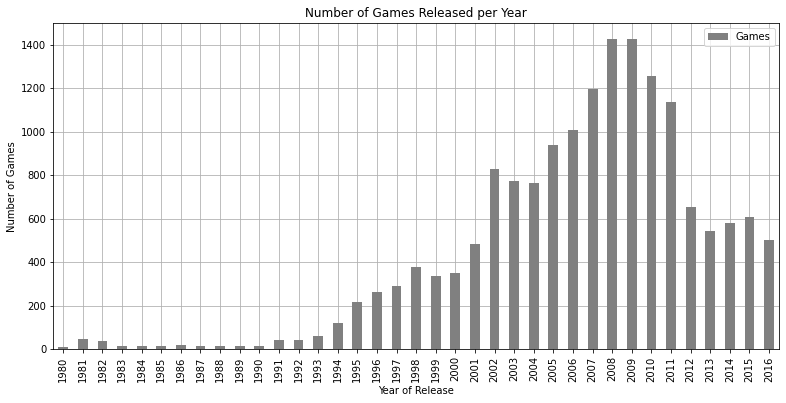

In [28]:
df_pivot_table.plot(kind='bar', 
                    figsize=(13, 6), 
                    color='grey',
                    grid=True, zorder=2)
plt.title('Number of Games Released per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.legend(['Games'], bbox_to_anchor=(1.001, 1), loc='best')
plt.show()

 Итого:
 - В период до 1993 года включительно выпускалось достаточно малое количество игр
 - В период с 1994 по 2016 гг. выпуск игр значительно вырос по сравнению с предыдущими годами, это наиболее важный период
 - Пик выпуска игр пришел на 2008-2009 гг.
 - После 2009 выпуск игр пошел на спад
 - Наиболее важный период для исследования - после 1993-94 гг. Т.к. до этого игр выпускалось совсем мало
 

##### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Строим сводную таблицу продаж по всем платформам, и смотрим на топ и выбираем наиболее успешные платформы с наибольшими суммарными продажами 

In [29]:
platform_sales = pd.pivot_table(df, values='all_sales', index='platform', aggfunc='sum').sort_values(by='all_sales')

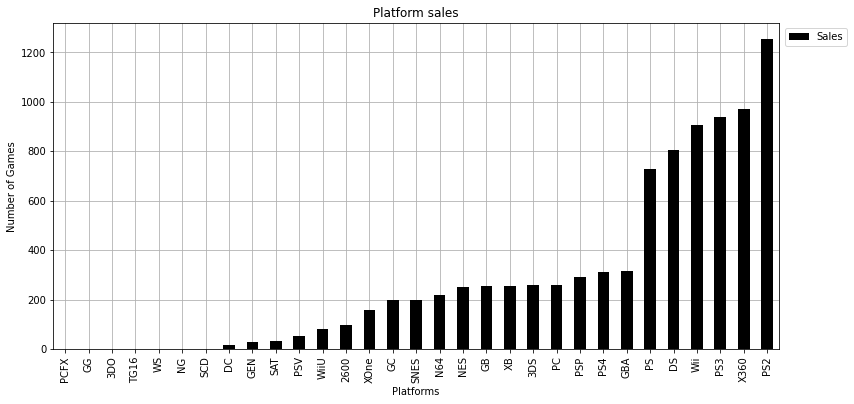

In [30]:
platform_sales.plot(kind='bar', 
                    figsize=(13, 6), 
                    color='black',
                    grid=True, 
                    zorder=2)
plt.title('Platform sales')
plt.xlabel('Platforms')
plt.ylabel('Number of Games')
plt.legend(['Sales'], bbox_to_anchor=(1.001, 1), loc='best')
plt.show()

создаем переменную для топ продаж - возьмем топ 6

In [31]:
#platforms_top6 = platform_sales.sort_values(by='all_sales', ascending=False).head(6)
#platforms_top6

Делаем сводную таблицу с распределением продажами по годам и платформе

In [32]:
sales_per_year = df.pivot_table(index='year_of_release', 
                                columns='platform', 
                                values='all_sales', 
                                aggfunc='sum').fillna(0) # я не понял откуда тут взялись NaN, т.к. до этого их не было...


sales_per_year

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
0,10.50,0.00,1.19,0.00,3.34,1.03,4.97,2.20,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,16.33,0.00,10.18,6.17,0.00
1980,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,28.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.45,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Строим график распределения продаж игр по консолям и по годам

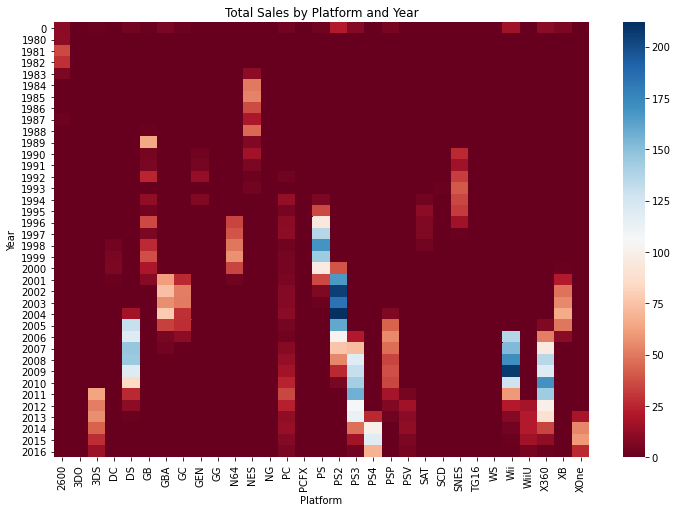

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(sales_per_year, cmap='RdBu')

plt.title('Total Sales by Platform and Year')
plt.xlabel('Platform')
plt.ylabel('Year')

plt.show() 

Итого:
- платформы с наибольшими продажами за все время: PS2, X360, PS3, Wii, DS, PS 
- период за который появляются новые платформы и изчезают старые - около 9 лет, это очень хороши заметно на серии консолей PS.

##### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Судя по данным о жизни консоли - около 10 лет, акутальный период который мы можем взять -это 5 лет, т.к. за это время приходится и взлет и спад и пик продаж и те консоли которые сейчас есть на рынке продержуться еще столько времени.

##### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [34]:
df_new = df.query('year_of_release >= 2015').reset_index(drop=True)

df_new_pivot_table = pd.pivot_table(df_new,
                                    index='year_of_release', 
                                    columns='platform', 
                                    values='all_sales', 
                                    aggfunc='sum').fillna(0)  

#df_new_pivot_table = df_new_pivot_table.drop('DS', axis=1) #посколько продажи консоли DS в 2013 уже на стадии умирание, удалим столбец

df_new_pivot_table

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


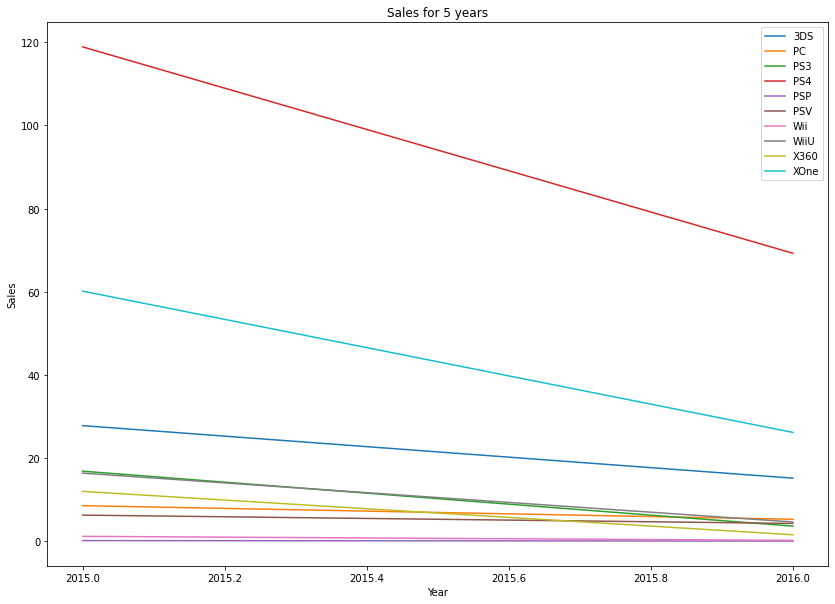

In [35]:
fig, ax = plt.subplots(figsize=(14, 10))

for col in df_new_pivot_table.columns: 
    ax.plot(df_new_pivot_table.index, df_new_pivot_table[col], label=col) 

ax.set_title('Sales for 5 years')
ax.set_xlabel('Year')
ax.set_ylabel('Sales')
ax.legend()
 
plt.show()

Итого:
- платформа с наибольшими продажами сейчас - PS4.
- по всем платформам сейчас идет снижение продаж
- Наиболее прибыльные платформы сейчас: PS4, PS3, XOne

##### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

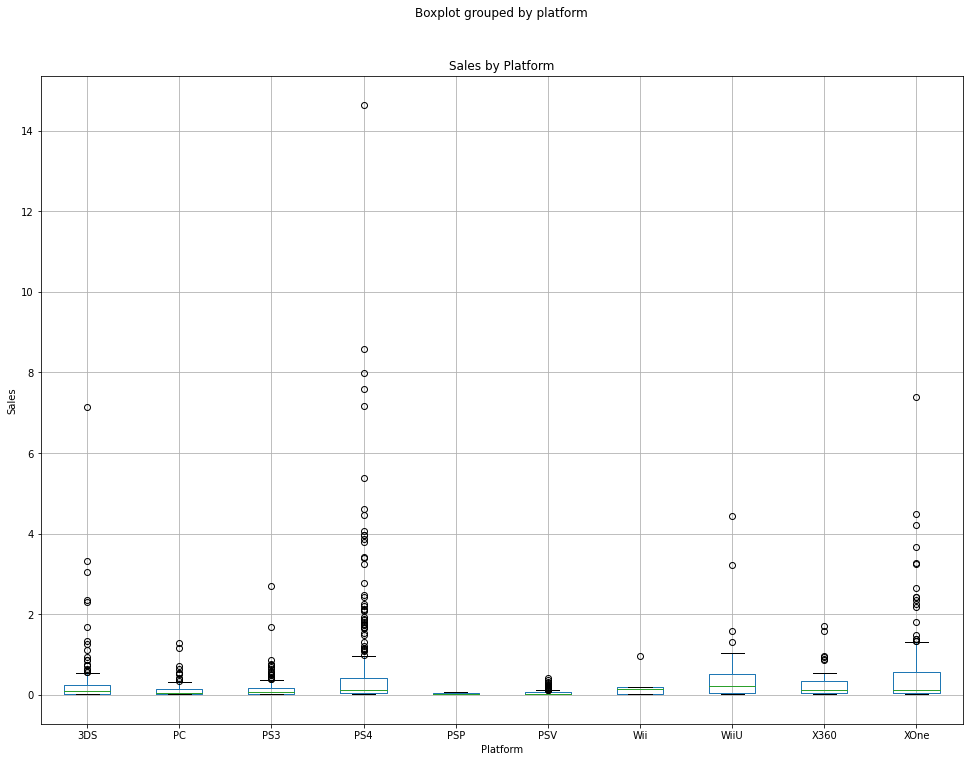

In [36]:
df_new.boxplot('all_sales', by='platform', figsize=(16, 12))

plt.title('Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Sales')

plt.show()

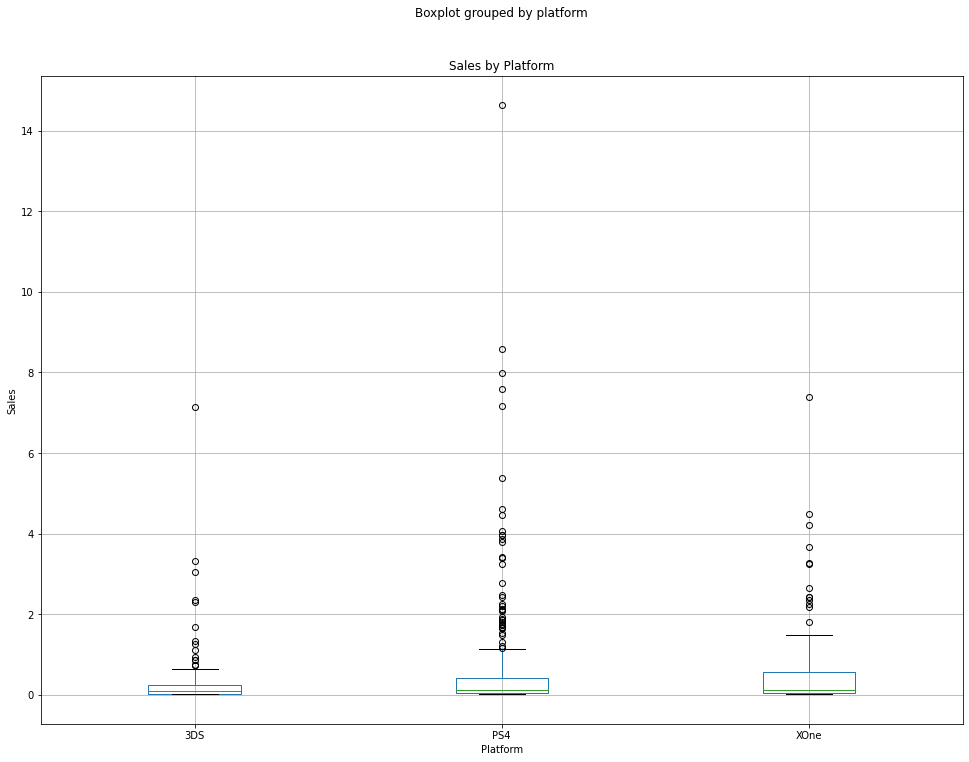

In [37]:
df_boxplot_top3 = df_new[df_new['platform'].isin(['PS4', 'XOne', '3DS'])]

df_boxplot_top3.boxplot('all_sales', by='platform', figsize=(16, 12), whis=2)

plt.title('Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Sales')

plt.show()

Итого:
- Ящик с усами показывает нам судя по выбросам, что самой прибыльной платформой сейчас является PS4 
- На втором месте XOne
- На третьем месте идет 3DS 

##### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.


Построим датафрейм где все платформы PS4 и сделаем диаграму рассеяности и вычислим корреляцию сначала для критиков, а затем для пользовательских оценок

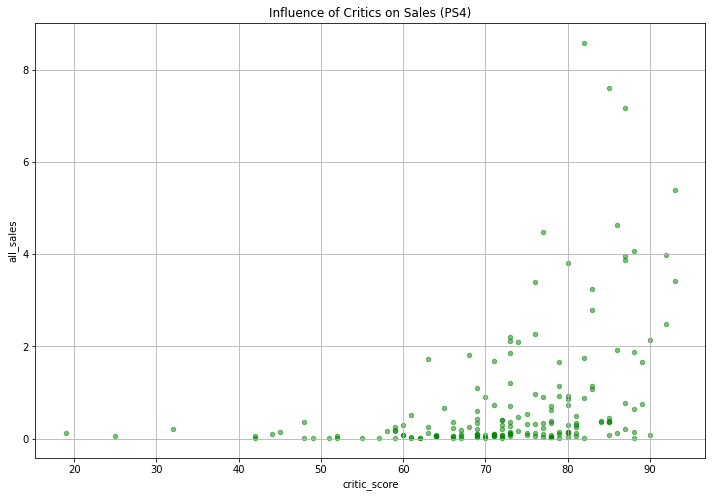

In [38]:
df_PS4 = df_new.dropna().query('platform == "PS4"') # тут можно удалить пропуски, т.к. данные непосредственно касаются отзывов

df_PS4.plot(kind='scatter', 
            x='critic_score',
            y='all_sales',
            figsize=(12, 8), 
            color='green',
            grid=True,
            alpha=0.5)

plt.title('Influence of Critics on Sales (PS4)') 

plt.show()

In [39]:
df_PS4_corr = df_PS4['all_sales'].corr(df_PS4['critic_score'])
display(df_PS4_corr)

0.3904400133131612

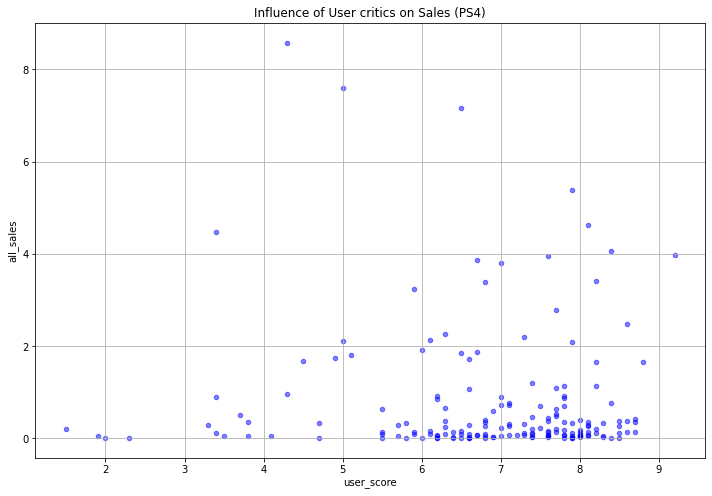

In [40]:
df_PS4.plot(kind='scatter', 
            x='user_score',
            y='all_sales',
            figsize=(12, 8), 
            color='blue',
            grid=True,
            alpha=0.5)

plt.title('Influence of User critics on Sales (PS4)') 

plt.show()

In [41]:
df_PS4_corr = df_PS4['all_sales'].corr(df_PS4['user_score'])
display(df_PS4_corr)

-0.058959403819253034

Итого:
- корреляция от пользовательских оценок очень низкая и близиться к нулю
- корреляция от оценок критиков достаточно значительная и высокие оценкии существенно поднимают продажи игр

##### Соотнесите выводы с продажами игр на других платформах.

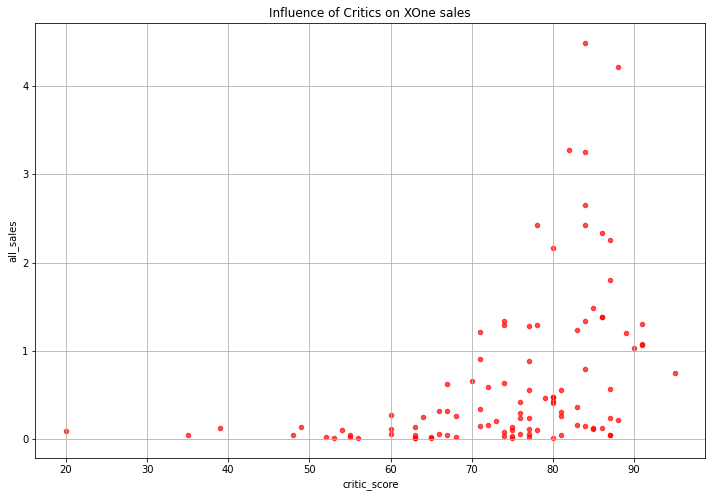

In [42]:
df_XOne = df_new.dropna().query('platform == "XOne"')  

df_XOne.plot(kind='scatter', 
            x='critic_score',
            y='all_sales',
            figsize=(12, 8), 
            color='red',
            grid=True,
            alpha=0.7)

plt.title('Influence of Critics on XOne sales') 

plt.show()

In [43]:
df_XOne_corr_critic_score = df_XOne['all_sales'].corr(df_XOne['critic_score'])
display(df_XOne_corr_critic_score)

0.42039210225136703

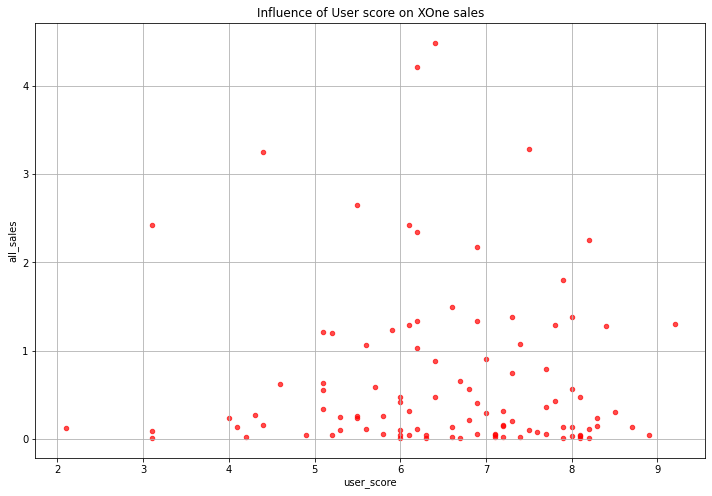

In [44]:
df_XOne.plot(kind='scatter', 
            x='user_score',
            y='all_sales',
            figsize=(12, 8), 
            color='red',
            grid=True,
            alpha=0.7)

plt.title('Influence of User score on XOne sales') 

plt.show()

In [45]:
df_XOne_corr_user_score = df_XOne['all_sales'].corr(df_XOne['user_score'])
display(df_XOne_corr_user_score)

-0.04525090033488067

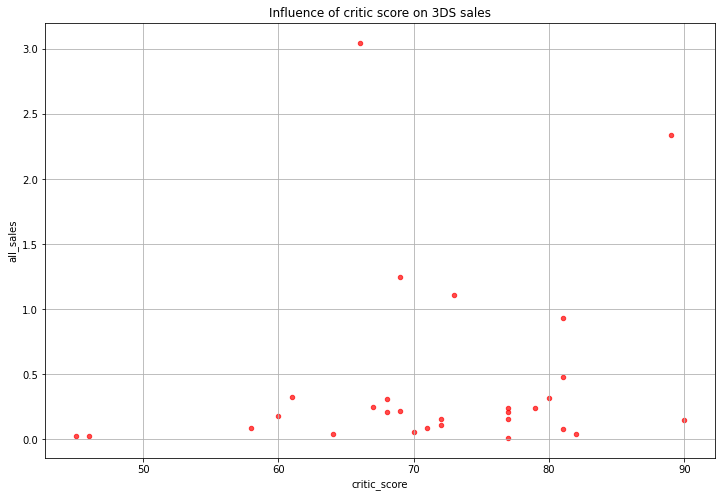

In [46]:
df_3DS = df_new.dropna().query('platform == "3DS"')  

df_3DS.plot(kind='scatter', 
            x='critic_score',
            y='all_sales',
            figsize=(12, 8), 
            color='red',
            grid=True,
            alpha=0.7)

plt.title('Influence of critic score on 3DS sales') 

plt.show()

In [47]:
df_3DS_corr_critic_score = df_3DS['all_sales'].corr(df_3DS['critic_score'])
display(df_3DS_corr_critic_score)

0.17757455046092874

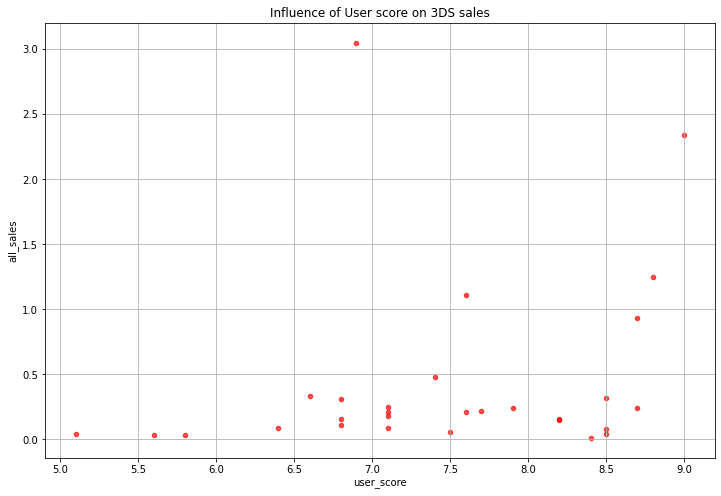

In [48]:
df_3DS.plot(kind='scatter', 
            x='user_score',
            y='all_sales',
            figsize=(12, 8), 
            color='red',
            grid=True,
            alpha=0.7)

plt.title('Influence of User score on 3DS sales') 

plt.show()

In [49]:
df_3DS_corr_user_score = df_3DS['all_sales'].corr(df_3DS['user_score'])
display(df_3DS_corr_user_score)

0.24047698587957067

Итоги:
- Между отзывами критиков и продажами на платформе **Xone** есть заметная положительная корреляция 
- Между отзывами пользователей и продажами на платформе **Xone** корреляция близиться к нулю


- Между отзывами критиков и продажами на платформе **3DS** очень cлабая положительной корреляции 
- Между отзывами пользователей и продажами на платформе **3DS** cлабая положительной корреляции 

##### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [50]:
genre_pivot = pd.pivot_table(df_new, 
                             index='genre', 
                             values='all_sales', 
                             aggfunc=['sum', 'mean', 'median', 'count']).sort_values(by=('sum', 'all_sales'), ascending=False)

display(genre_pivot)

,sum,mean,median,count
,all_sales,all_sales,all_sales,all_sales
genre,,,,
Shooter,105.73,1.305309,0.380,81
Action,102.13,0.236961,0.060,431
Sports,64.33,0.601215,0.120,107
Role-Playing,55.82,0.422879,0.115,132
Misc,14.17,0.199577,0.060,71
Fighting,12.37,0.334324,0.090,37
Adventure,11.98,0.108909,0.030,110
Racing,10.86,0.258571,0.055,42


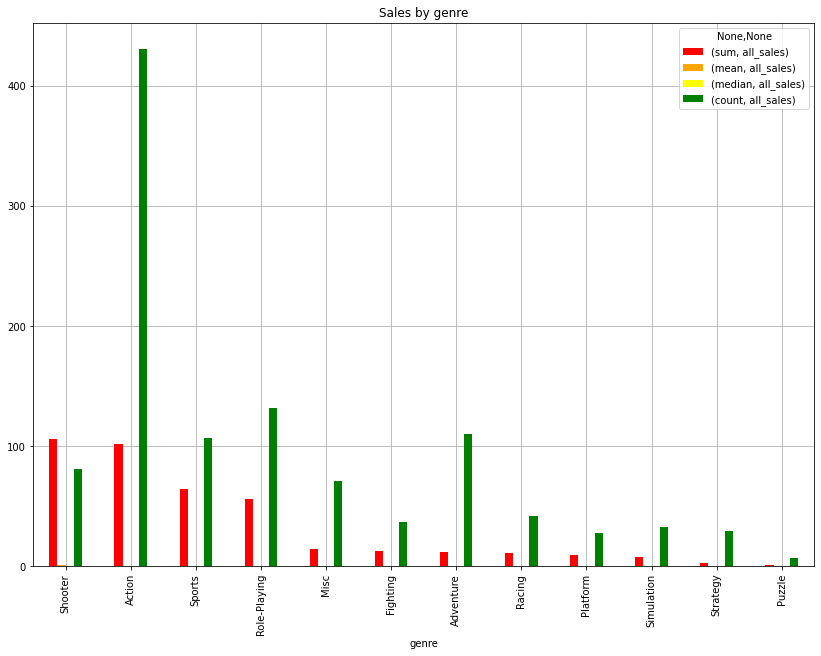

In [51]:
сolors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown', 'gray', 'black']
genre_pivot.plot(kind='bar', 
                 figsize=(14, 10), 
                 color=сolors,
                 grid=True,
                 zorder=2)

plt.title('Sales by genre') 

plt.show()

Итоги:
- Жанр Shooter и Action опережает остальные жанры по продажам и находятся в лидерах. Причем жанр Shooter опережает все остальные жанры значительно по средней и медиане, это также самый прибыльный жанр по соотношению кол-ва игр и продаж, несмотря на то что их выпускается в несколько раз меньше чем в жанре Aсtion они опережают их по продажам.
- На 3 и 4 месте Sports и Role-Playing. Эти жанры также опережают жанр Action по средней.
- Похоже что в жанре Action держиться в топе по побльшой часте за счет большого кол-ва выпускаемых игр по сравнению с другими жанрами
- Жанры с самыми плохии продажами: Puzzle, Adventure, Simulation

# Шаг 4. Составьте портрет пользователя каждого региона
 

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Построим сводные таблицы для всех нужных нам регионов и посчитаем продажи в каждом по платформам и по жанрам

In [52]:
top_5_platforms_NA = pd.pivot_table(df_new, 
                                 index='platform', 
                                 values='na_sales', 
                                 aggfunc='sum').sort_values(by='na_sales', ascending=False).head()

display(top_5_platforms_NA)  


top_5_platforms_EU = pd.pivot_table(df_new, 
                                 index='platform', 
                                 values='eu_sales', 
                                 aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()

display(top_5_platforms_EU) 


top_5_platforms_JP = pd.pivot_table(df_new, 
                                 index='platform', 
                                 values='jp_sales', 
                                 aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

display(top_5_platforms_JP) 

,na_sales
platform,
PS4,63.86
XOne,50.30
3DS,10.31
WiiU,8.86
X360,8.05


,eu_sales
platform,
PS4,83.54
XOne,28.10
PC,9.10
3DS,7.39
PS3,7.30


,jp_sales
platform,
3DS,23.55
PS4,12.05
PSV,8.41
PS3,4.97
WiiU,4.12


In [53]:
top_5_genres_NA = pd.pivot_table(df_new, 
                                 index='genre', 
                                 values='na_sales', 
                                 aggfunc='sum').sort_values(by='na_sales', ascending=False).head()

display(top_5_genres_NA) 

top_5_genres_EA = pd.pivot_table(df_new, 
                                 index='genre', 
                                 values='eu_sales', 
                                 aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()

display(top_5_genres_EA) 

top_5_genres_JP = pd.pivot_table(df_new, 
                                 index='genre', 
                                 values='jp_sales', 
                                 aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

display(top_5_genres_JP) 

,na_sales
genre,
Shooter,48.18
Action,33.68
Sports,26.31
Role-Playing,19.82
Misc,5.58


,eu_sales
genre,
Shooter,40.28
Action,34.82
Sports,27.82
Role-Playing,17.21
Racing,6.52


,jp_sales
genre,
Action,23.05
Role-Playing,13.41
Shooter,3.79
Misc,3.19
Adventure,2.22


Итоги:

Популярность топ-2 платформ в Америке и Европе одинковая. В Европе на 3 месте по поулярности стоит PC, в то время как в Америке и Японии его нет даже в топ-5. В Японии лидер - 3DS.

**Платформы**:

Топ 5 в регионе **NA**: 
- PS4
- XOne
- 3DS
- WiiU
- X360

Топ 5 в регионе **EA**: 
- PS4	
- XOne
- PC
- 3DS	
- PS3

Топ 5 в регионе **JP**: 
- 3DS
- PS4	
- PSV
- PS3	
- WiiU	

**Жанры**:

Жанры в Европе и Америке практически одинаковые, разница только в жанрах на 5 месте - Racing(EU) и Misc(NA). В Японии самый популярный жанр - Action.

Топ 5 в регионе **NA**: 
- Shooter	 
- Action	 
- Sports	  
- Role-Playing	 
- Misc

Топ 5 в регионе **EA**: 
- Shooter	 
- Action	 
- Sports	  
- Role-Playing	 
- Racing

Топ 5 в регионе **JP**: 
- Action
- Role-Playing
- Shooter	
- Misc
- Adventure

##### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Постоим сводные таблицы по рейтенгу ESRB

,na_sales
rating,
M,47.03
E,26.59
T,22.86
E10+,17.87


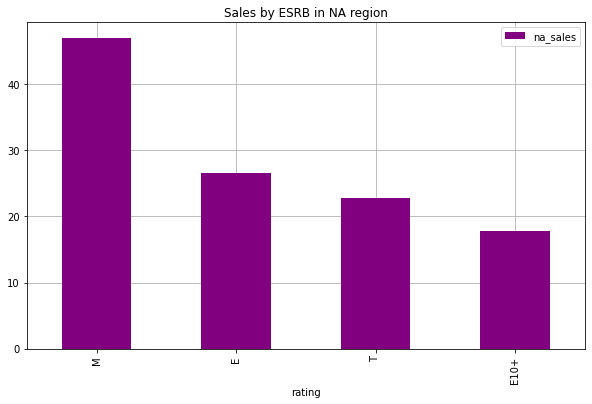

In [54]:
esrb_pivot_na = df_new.pivot_table(index='rating', 
                                   values='na_sales', 
                                   aggfunc='sum').sort_values(by='na_sales', ascending=False)

display(esrb_pivot_na)

esrb_pivot_na.plot(kind='bar', 
                figsize=(10, 6), 
                color='purple',
                grid=True,
                zorder=2)

plt.title('Sales by ESRB in NA region') 

plt.show()

,eu_sales
rating,
M,45.54
E,34.83
T,20.32
E10+,11.54


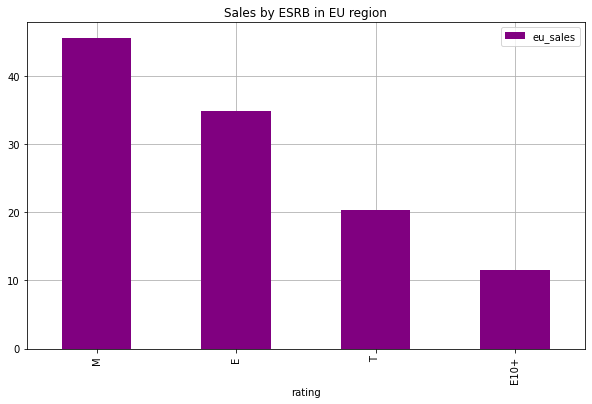

In [55]:
esrb_pivot_eu = df_new.pivot_table(index='rating', 
                                   values='eu_sales', 
                                   aggfunc='sum').sort_values(by='eu_sales', ascending=False)

display(esrb_pivot_eu)

esrb_pivot_eu.plot(kind='bar', 
                figsize=(10, 6), 
                color='purple',
                grid=True,
                zorder=2)

plt.title('Sales by ESRB in EU region') 

plt.show()

,jp_sales
rating,
T,7.70
E,5.25
M,4.29
E10+,3.27


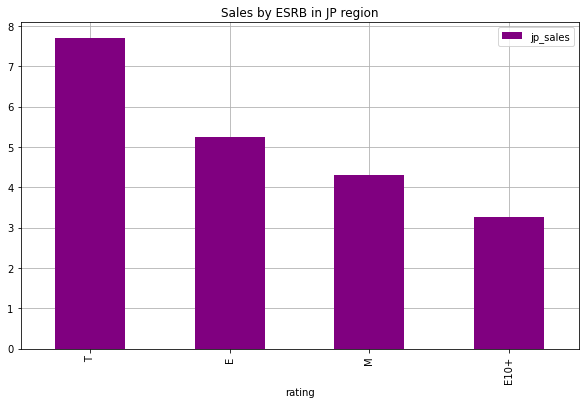

In [56]:
esrb_pivot_jp = df_new.pivot_table(index='rating', 
                                   values='jp_sales', 
                                   aggfunc='sum').sort_values(by='jp_sales', ascending=False)

display(esrb_pivot_jp)

esrb_pivot_jp.plot(kind='bar', 
                figsize=(10, 6), 
                color='purple',
                grid=True,
                zorder=2)

plt.title('Sales by ESRB in JP region') 

plt.show()

,all_sales
rating,
M,111.10
E,75.24
T,57.73
E10+,36.68


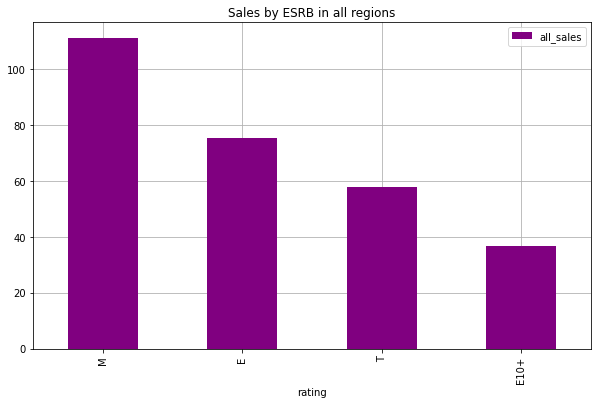

In [57]:
esrb_pivot = df_new.pivot_table(index='rating', 
                                values='all_sales', 
                                aggfunc='sum').sort_values(by='all_sales', ascending=False)

display(esrb_pivot)

esrb_pivot.plot(kind='bar', 
                figsize=(10, 6), 
                color='purple',
                grid=True,
                zorder=2)

plt.title('Sales by ESRB in all regions') 

plt.show()

Итоги:
- В Америке и Европе идентичная показатели продаж соответствующих рейтингов. Самый популярный рейтинг для выпуска игр: 'M', далее идут 'E', 'T', 'E10+'.
- В Японии cамый популярный рейтинг для выпуска игр: 'T', далее идут 'E', 'M', 'E10+'.
- Если брать продажи по всем регионам то лучший рейтинг - 'M', далее идут 'E', 'T', 'E10+'
- 'E10+' самый непопулярный рейтинг во всех регионах


# Шаг 5. Проверьте гипотезы
 

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 

Нулевая гипотеза:

- Средние пользовательские рейтинги платформ Xbox ONE и PC одинаковые.

Альтернативная гипотеза:

- Средние пользовательские рейтинги платформ Xbox ONE и PC различаются.

Гипотеза о равенстве средних двух генеральных совокупностей. Применяем двусторонний критерий, так как разница рейтингов по платформам может быть как в положительную сторону, так и в отрицательную.

In [58]:
df_Xbox = df_new.dropna().query('platform == "XOne"')
df_PC = df_new.dropna().query('platform == "PC"')

sample_1 = df_Xbox['user_score']
sample_2 = df_PC['user_score']

alpha = 0.05 

results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение:  0.3212770066340128
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox ONE и PC ориентировочно одинаковые, т.к. не удалось отвергунть нулевую гипотезу

##### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза:

- Средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза:

- Средние пользовательские рейтинги жанров Action и Sports различаются.

In [59]:
df_action = df_new.dropna().query('genre == "Action"')
df_sports = df_new.dropna().query('genre == "Sports"')

sample_1 = df_sports['user_score']
sample_2 = df_action['user_score']

alpha = 0.05 

results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  2.2251479989476883e-05
Отвергаем нулевую гипотезу


Гипотезу о том что средние пользовательские рейтинги жанров Action и Sports равны отвергаем. Значит есть разница между оценками игроков в жанре Action и Sports. 

# Выводы

#### Провели предобработку данных:

Обработали дупликаты:
- Явные дупликаты в датафрейме отсутствуют.
- Неявные Дубликаты в столбце 'name' отсутствуют. Те дубликаты что присутствуют, вызваны тем, что игры выходили на разнах платформах, либо переиздавалась.
- Неявные Дубликаты в столбцах 'genre' и 'platform' также отсутствуют.

Изменены типы данных в датафрейме:
- year_of_realease — из float в int (в этом столбце года, писать их типом флоат нет нужды)
- user_score — из object в int (тут числа, так что object не подходит)

Обработали пропуски:
- Обработаны пропуски в столбце year_of_release
- Удалены пропуски в столбце name
- Изучены и обработаны пропуски в столбце user_score
- Изменены типы данных в столбцах year_of_realease — из float в int и user_score — из object в int
- Посчитаны суммарные продажи во всех регионах и перенесены в новый признак датафрейма

#### Провели исследовательский анализ данных за весь период и за актуальный период 5 лет

- В период до 1993 года включительно выпускалось достаточно малое количество игр
- В период с 1994 по 2016 гг. выпуск игр значительно вырос по сравнению с предыдущими годами, это наиболее важный период
- Пик выпуска игр пришел на 2008-2009 гг.
- После 2009 выпуск игр пошел на спад
- Наиболее важный период для исследования - после 1993-94 гг. Т.к. до этого игр выпускалось совсем мало
- Платформы с наибольшими продажами за все время: PS2, X360, PS3, Wii, DS, PS 
- Период за который появляются новые платформы и изчезают старые - около 9 лет, это очень хороши заметно на серии консолей PS.

#### Провели исследовательский анализ данных за актуальный период 2 года

- Платформа с наибольшими продажами за 2 года - PS4.
- По всем платформам сейчас идет снижение продаж
- Наиболее прибыльные платформы сейчас: PS4, XOne, 3DS
- Самой прибыльной платформой сейчас является PS4 
- На втором месте также и XOne
- На третьем месте идет 3DS 

Зависимость продаж от оценок критиков и пользователей
- Корреляция пользовательских оценок очень низкая и близиться к нулю
- Корреляция оценок критиков достаточно значительная и высокие оценкии существенно поднимают продажи игр
- Между отзывами критиков и продажами на всех платформах есть небольшая положительная корреляция 
- Между отзывами пользователей и продажами на всех платформах есть очень слабая положительная корреляция

Популярность жанров:
- Жанр Shooter и Action опережает остальные жанры по продажам и находятся в лидерах. Причем жанр Shooter опережает все остальные жанры значительно по средней и медиане, это также самый прибыльный жанр по соотношению кол-ва игр и продаж, несмотря на то что их выпускается в несколько раз меньше чем в жанре Aсtion они опережают их по продажам.
- На 3 и 4 месте Sports и Role-Playing. Эти жанры также опережают жанр Action по средней.
- Похоже что в жанре Action держиться в топе по побльшой часте за счет большого кол-ва выпускаемых игр по сравнению с другими жанрами
- Жанры с самыми плохии продажами: Puzzle, Adventure, Simulation

 Портрет пользователя каждого  региона (NA, EU, JP): 
 
 - Популярность топ-2 платформ в Америке и Европе одинковая. В Европе на 3 месте по поулярности стоит PC, в то время как в Америке и Японии его нет даже в топ-5. В Японии лидер - 3DS.

- Жанры в Европе и Америке практически одинаковые, разница только в жанрах на 5 месте - Racing(EU) и Misc(NA). В Японии самый популярный жанр - Action.

- Пользователь NA - любит Shooter и Action, предпочитает играть на консолях.
- Пользователь EU - также любит Shooter и Action, предпочитает играть на консолях и на PC
- Пользователь JP - любит Action и Role-play, предпочитает играть на консолях.

- В целом, сердний пользователь больше всего любит три жанр игр - Shooter, Action и Role-play и играет в онсовном на консолях

Влияние рейтинга ESRB:
- В Америке и Европе идентичная показатели продаж соответствующих рейтингов. Самый популярный рейтинг для выпуска игр: 'M', далее идут 'E', 'T', 'E10+'.
- В Японии cамый популярный рейтинг для выпуска игр: 'T', далее идут 'E', 'M', 'E10+'.
- Если брать продажи по всем регионам то лучший рейтинг - 'M', далее идут 'E', 'T', 'E10+'
- 'E10+' самый непопулярный рейтинг во всех регионах

#### Проверили гипотезы

Нулевая гипотеза№1:

- Средние пользовательские рейтинги платформ Xbox ONE и PC одинаковые.

Средние пользовательские рейтинги платформ Xbox ONE и PC ориентировочно одинаковые, т.к. не удалось отвергунть нулевую гипотезу

Нулевая гипотеза№2:

- Средние пользовательские рейтинги жанров Action и Sports равны.

Гипотезу о том что средние пользовательские рейтинги жанров Action и Sports различаются отвергаем. Значит есть разница между оценками игроков в жанре Action и Sports.